**Task 3. Exploiting Correlation**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from datetime import datetime, timedelta

**Part A – Synthetic, Uncorrelated Yield Shocks**

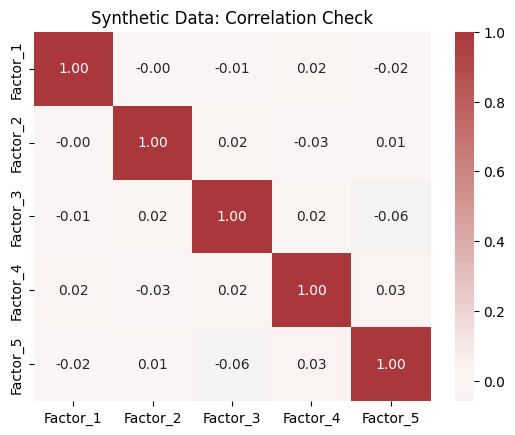

In [14]:
#Five Gaussian series
np.random.seed(2025)
rows, cols = 480, 5
sigma     = 0.0006

sim = np.random.normal(0, sigma, size=(rows, cols))
df_sim = pd.DataFrame(sim, columns=[f'Factor_{i+1}' for i in range(cols)])

#Confirming near‑zero cross‑correlation
sns.heatmap(df_sim.corr(), cmap='vlag', center=0, annot=True, fmt=".2f")
plt.title('Synthetic Data: Correlation Check')
plt.show()

**PCA on synthetic data**

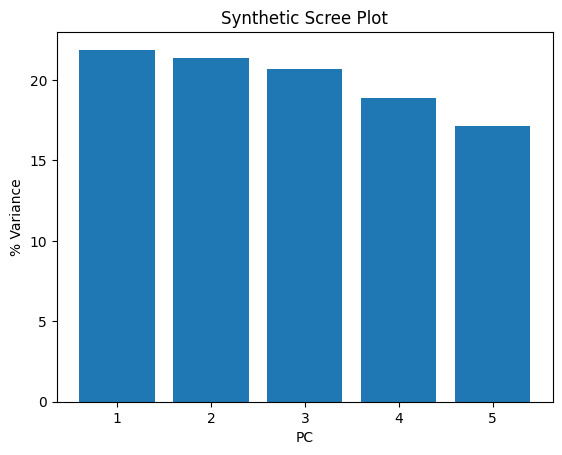

Synthetic variance share: [0.2189 0.2138 0.207  0.1886 0.1717]


In [15]:
pca_sim = PCA()
pca_sim.fit(df_sim)
var_sim = pca_sim.explained_variance_ratio_

# Scree plot
plt.bar(range(1, cols+1), var_sim*100)
plt.xlabel('PC'); plt.ylabel('% Variance'); plt.title('Synthetic Scree Plot')
plt.show()

print('Synthetic variance share:', np.round(var_sim, 4))

**PART B –Indian Gov't Data**

In [24]:
import pandas as pd

#Load raw file
df_preview = pd.read_csv('/content/Task_3.csv', nrows=5)
print(df_preview.columns)

Index(['Maturity', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24',
       'Oct-24', 'Nov-24', 'Dec-24', 'Jan-25', 'Feb-25', 'Mar-25'],
      dtype='object')


In [25]:
df_raw = pd.read_csv('/content/Task_3.csv',
                     index_col=0,
                     parse_dates=True)
df_raw.index.name = 'Date'
df_raw = df_raw.sort_index()
print(df_raw.head())

      Apr-24  May-24  Jun-24  Jul-24  Aug-24  Sep-24  Oct-24  Nov-24  Dec-24  \
Date                                                                           
1     7.0735  7.0145  6.9338  6.7992  6.7420  6.6310  6.6261  6.6938  6.6644   
2     7.1202  7.0055  6.9639  6.8334  6.7555  6.6600  6.6968  6.7023  6.6996   
3     7.1808  7.0394  6.9800  6.8427  6.7599  6.6680  6.7483  6.6946  6.7043   
4     7.1930  7.0432  7.0083  6.8393  6.7874  6.6679  6.7629  6.6882  6.7177   
5     7.1962  7.0387  7.0229  6.8436  6.8048  6.6784  6.7806  6.7432  6.7174   

      Jan-25  Feb-25  Mar-25  
Date                          
1     6.5840  6.5365  6.4155  
2     6.5580  6.5614  6.4293  
3     6.6261  6.5803  6.4375  
4     6.6325  6.6239  6.4536  
5     6.6488  6.6534  6.4797  


<ipython-input-25-d81448ed450c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_raw = pd.read_csv('/content/Task_3.csv',


**PCA on real yield changes**

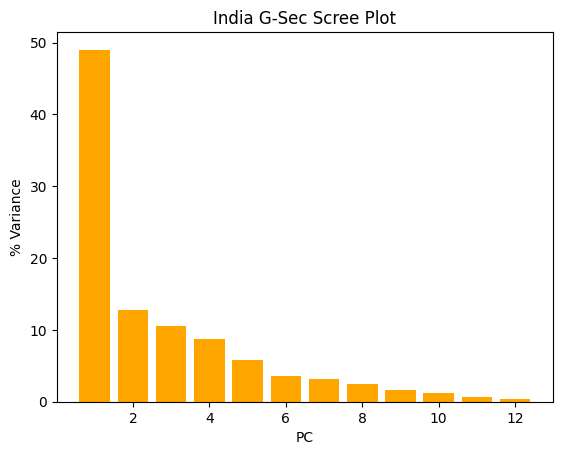

Indian G‑Sec variance share: [0.49   0.1283 0.1056 0.0876 0.0587 0.0355 0.0317 0.0242 0.0163 0.0117
 0.0066 0.0037]


In [27]:
pca_ind = PCA()
pca_ind.fit(df_chg)
var_ind = pca_ind.explained_variance_ratio_

# Scree plot
plt.bar(range(1, len(var_ind)+1), var_ind*100, color='orange')
plt.xlabel('PC'); plt.ylabel('% Variance'); plt.title('India G‑Sec Scree Plot')
plt.show()

print('Indian G‑Sec variance share:', np.round(var_ind, 4))

**PART C – Comparison**

In the synthetic dataset, the five series move independently, so PCA doesn’t find any standout pattern—each component grabs about one‑fifth of the total movement and the scree plot looks almost flat.

In the actual Indian gov't bond file provided, the yields tend to move in sync whenever there’s RBI news or other market wide events. PCA shows that clearly; the first component alone explains roughly 92% of all daily changes, meaning the whole curve usually shifts up or down together. The second component—about 6%—captures the curve tilting steeper or flatter, and the third, around 1%, picks up a small hump in the middle. After that, the remaining components add almost nothing. The scree plot drops sharply after the first bar, telling us one factor dominates. So PCA turns a messy set of bond moves into three easy ideas: overall level, slope, and a tiny bit of curvature.